In [2]:
import os
import math
import pickle
import numpy as np
from math import log
from scipy import signal 
import matplotlib as mpl
from statistics import mean
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
from scipy.ndimage import gaussian_filter
from collections import defaultdict, OrderedDict

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 9
rcParams.update({'figure.max_open_warning': 0,
                 'font.size': 14,
                 'axes.titlesize': 14,
                 'axes.labelsize': 14,
                 'axes.grid':True,
                 'xtick.direction': 'in',
                 'ytick.direction': 'in',
                 'ytick.right': True,
                 'xtick.top':True,                 
                 'ytick.major.size': 10,
                 'xtick.major.size': 10,
                 'legend.fancybox': True,
                 'legend.markerscale': 0.8,
                 'legend.handlelength': 5.0
                 #'axes.prop_cycle': cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']),

                 
                 #'xtick.labelsize': 12,
                 #'ytick.labelsize': 12
                })

#from cycler import cycler
mpl.rcParams['grid.linestyle'] = '-.'
#rcParams.keys() 
#plt.style.use('dark_background')
#print(plt.style.available)

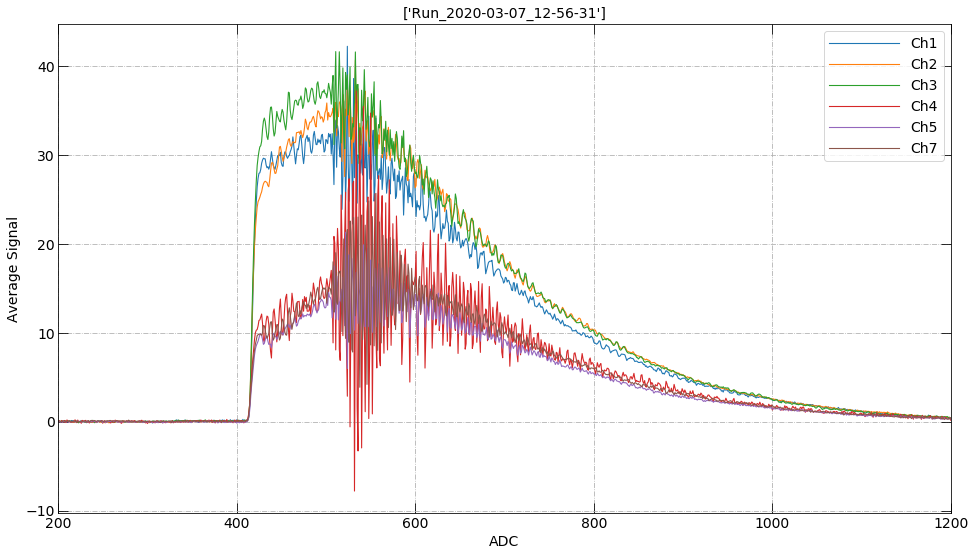

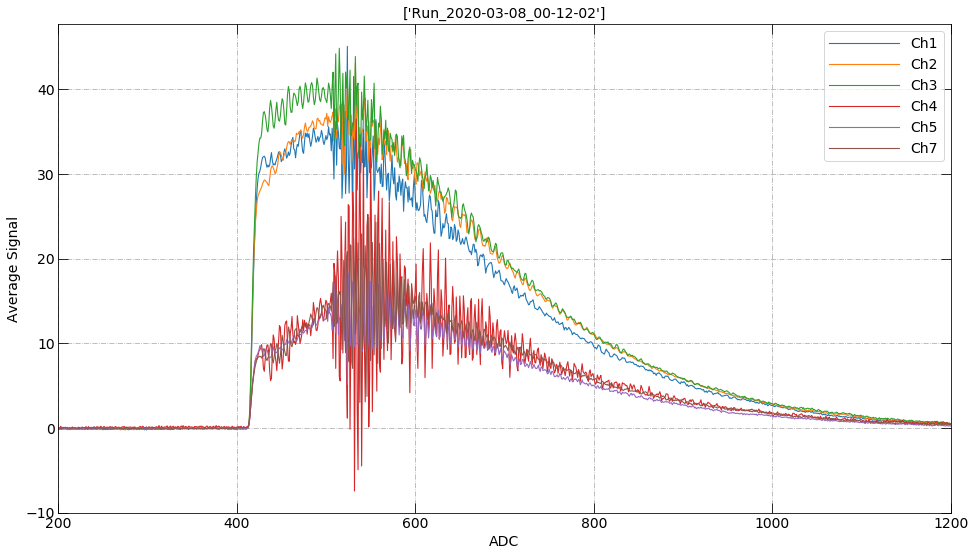

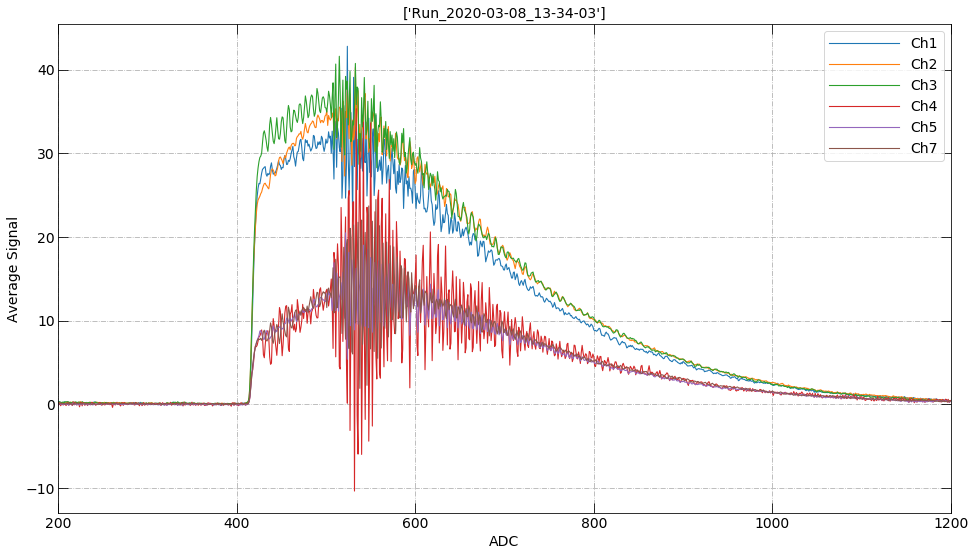

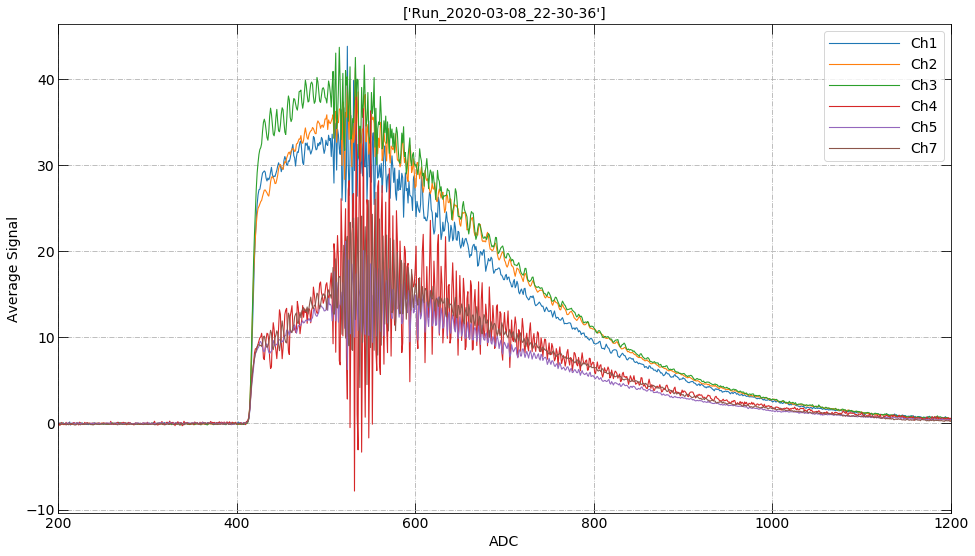

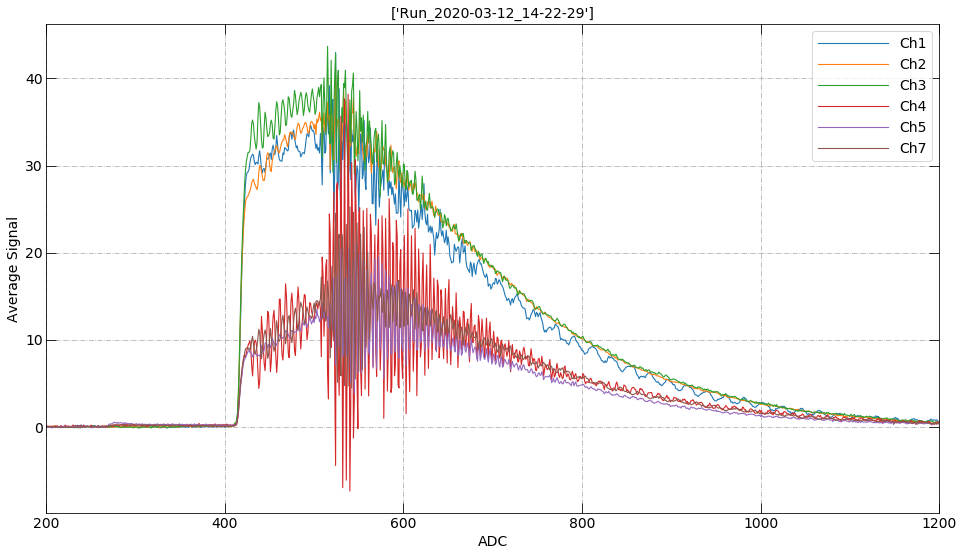

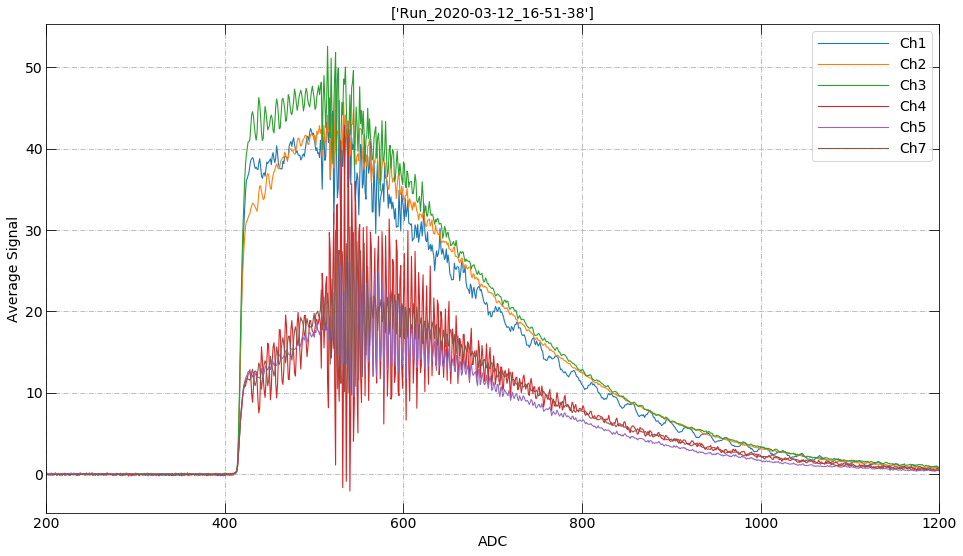

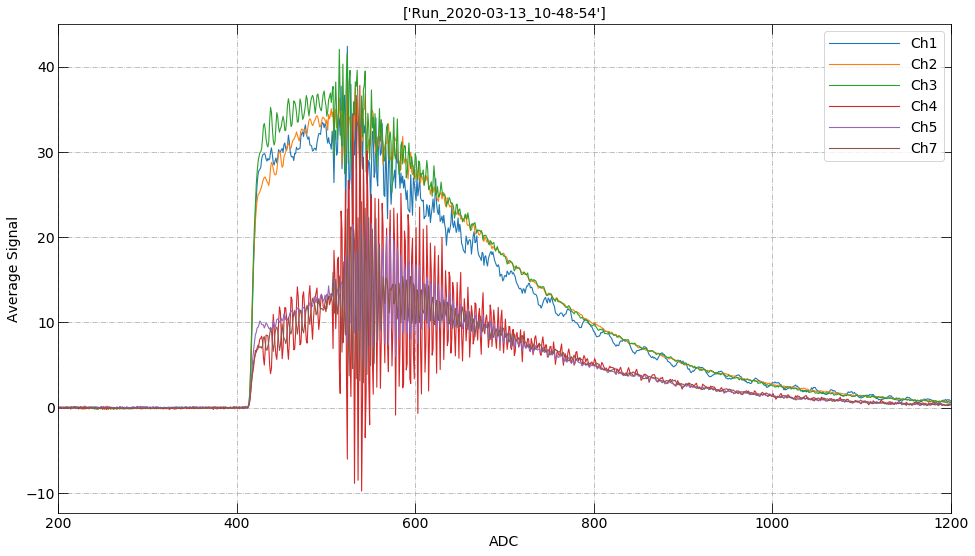

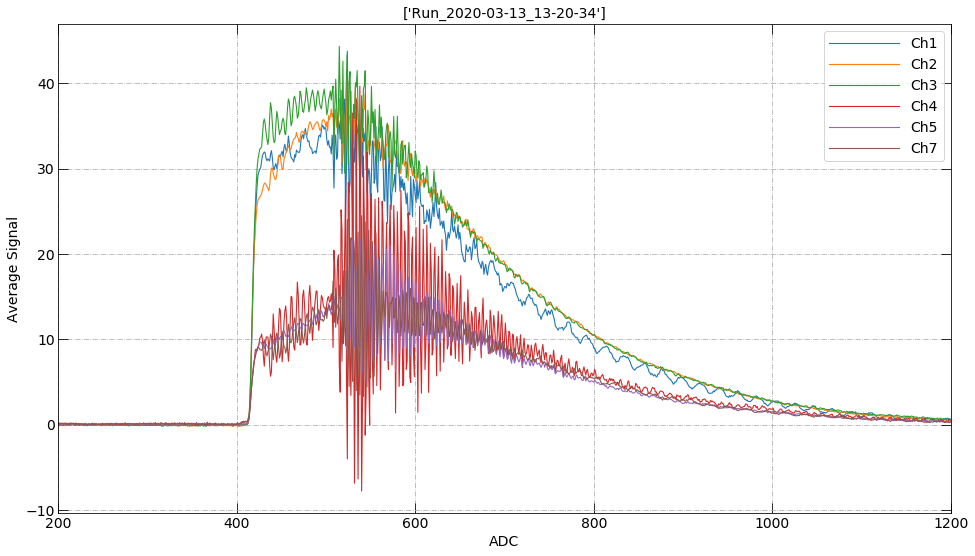

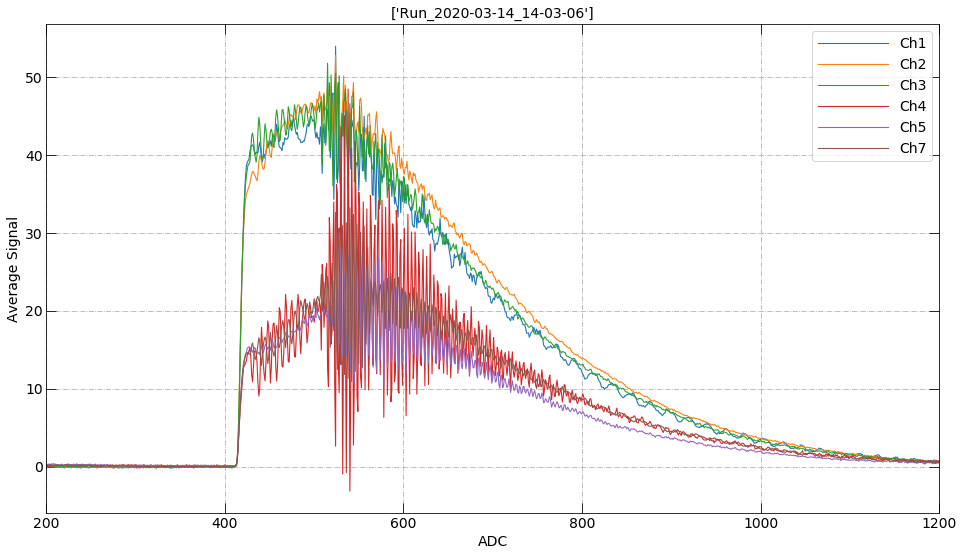

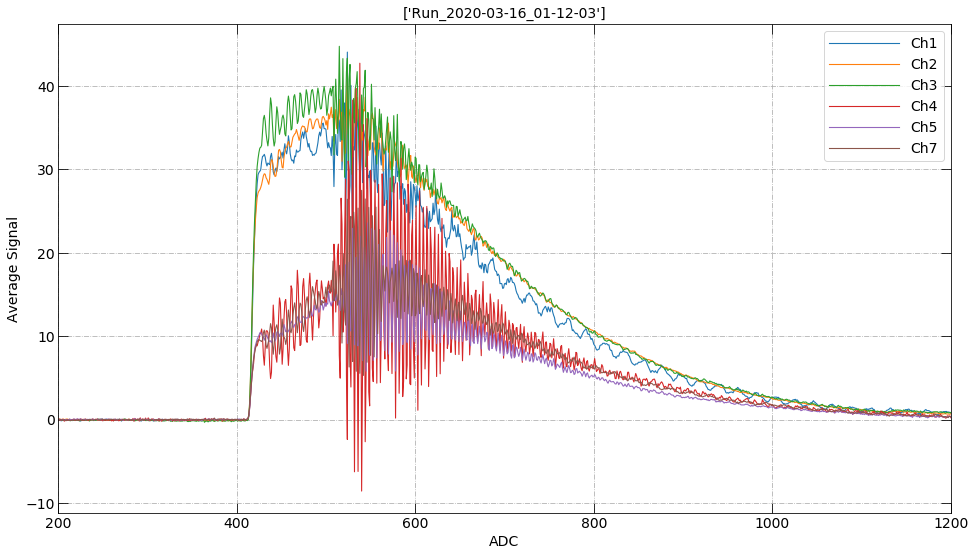

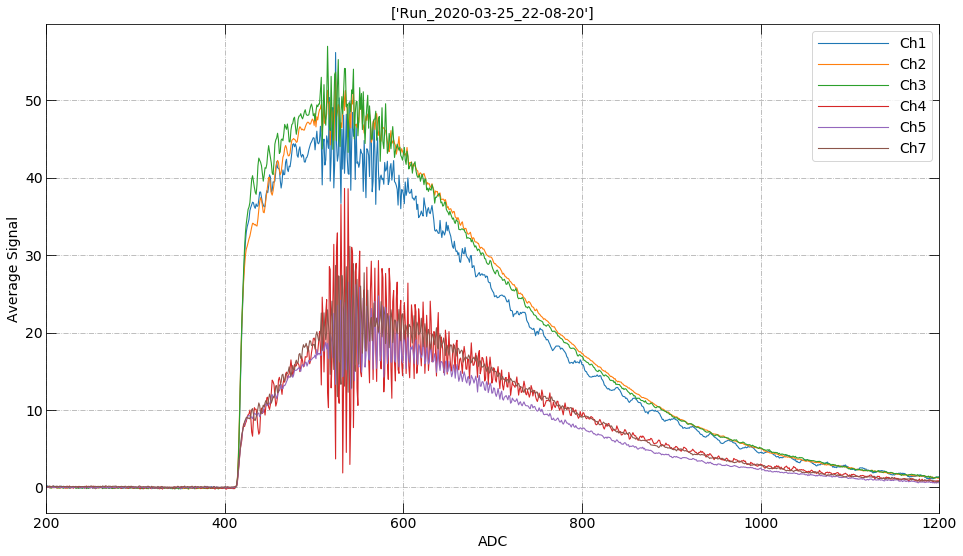

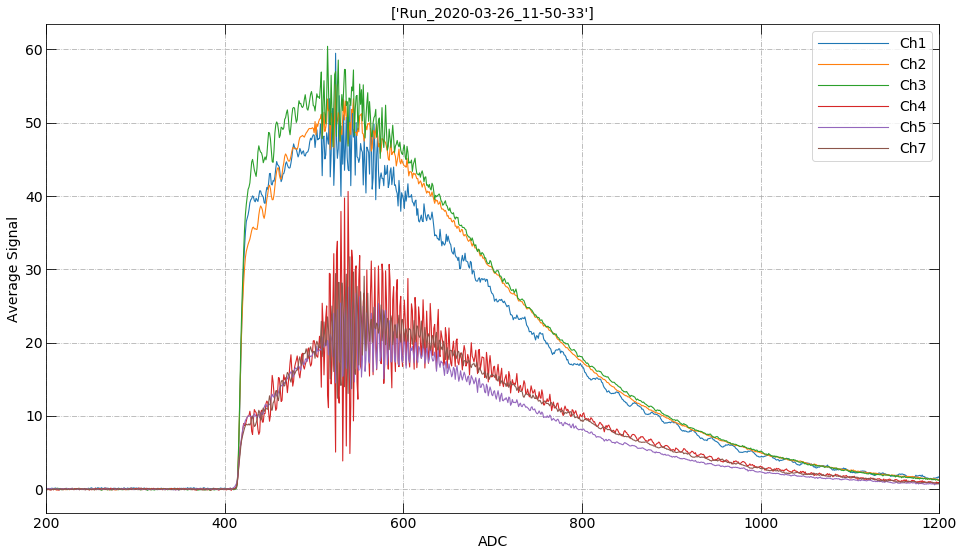

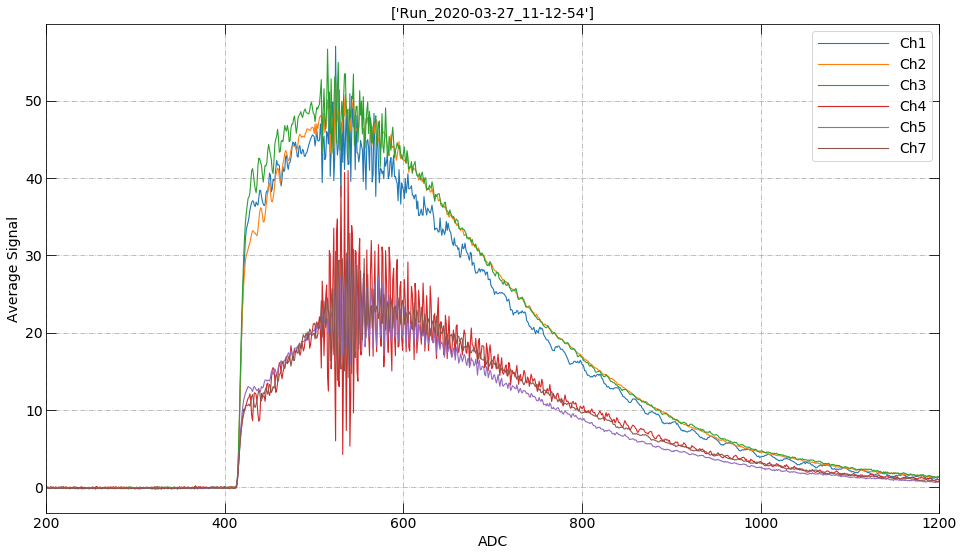

In [4]:
dirname = '/home/furkan/data/test_pods/'
Run = []
if not os.path.exists('run_by'):
    os.makedirs('run_by')

for filename in sorted(os.listdir(dirname)):
    if '.pkl' in filename:
            #print(str(os.path.splitext(filename)[0]))
            Run = []
            Run: Run.append('Run_' +filename.split('.pkl')[0])
            #print(Run)
            with open(dirname+filename,'rb') as fin:
                mydata = pickle.load(fin)
            #pkl_file = open(dirname + str(os.path.splitext(filename)[0]) + '.pkl', 'rb')
            #mydata = pickle.load(pkl_file)

            dict_s ={}
            for key, value in mydata.items():
                #print(mydata[key].max(axis=0))
                channel=mydata[key]
                dict_s.update({key:channel})

            for key, value in dict_s.items():
                plt.plot(range(1, len(value) + 1), value, label=key, linewidth=1.1)
                # NOTE: changed `range(1, 4)` to mach actual values count
            plt.title(Run)
            #print(Run)
            plt.xlabel('ADC')
            plt.ylabel('Average Signal')
            plt.ticklabel_format(style='plain')
            #plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
            plt.legend() 
            #plt.yscale('log')
            plt.xlim(200, 1200)
            #plt.ylim(-25, 80)
            #plt.xlim(300, 1500)

            plot_path = os.path.abspath('run_by') 
            plot_name = 'run_by'+str(filename.split('.pkl')[0])+'.png'
            plt.savefig(os.path.join(plot_path, plot_name))
            plt.show()

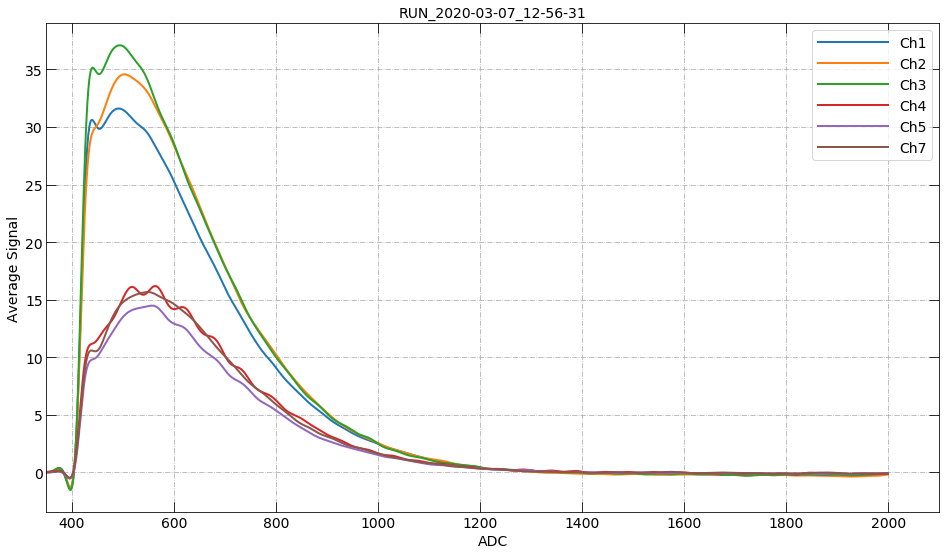

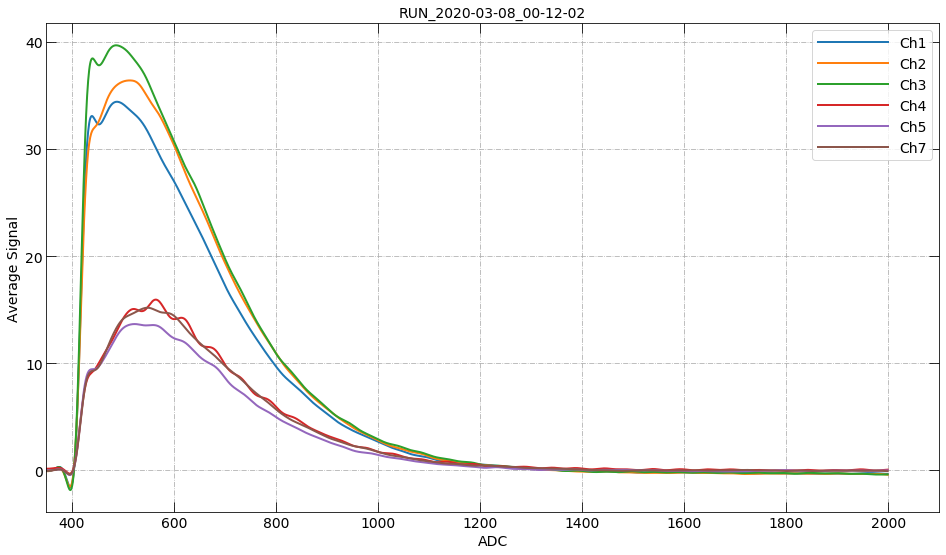

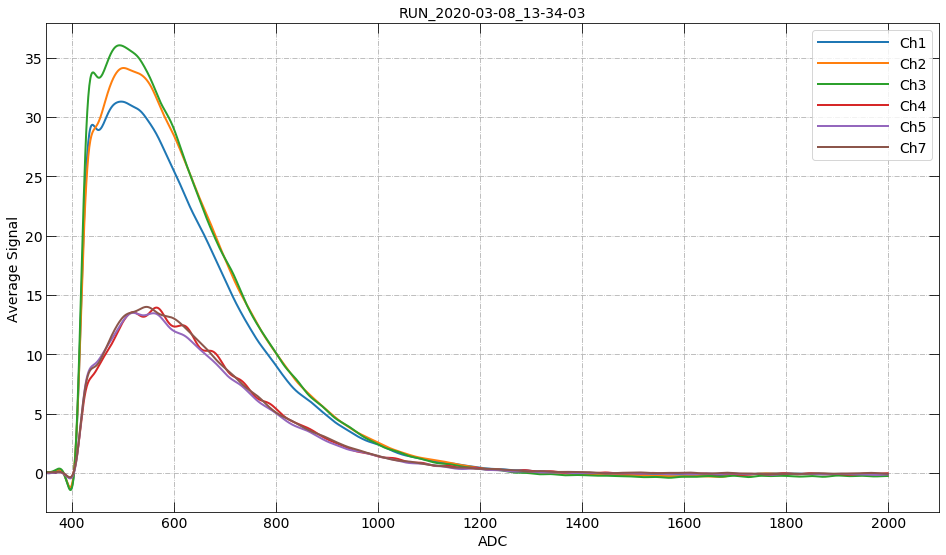

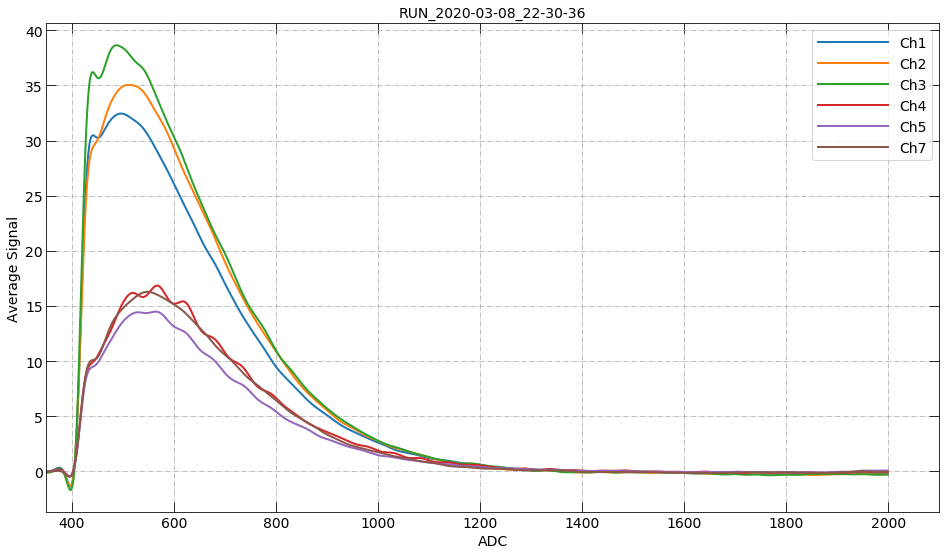

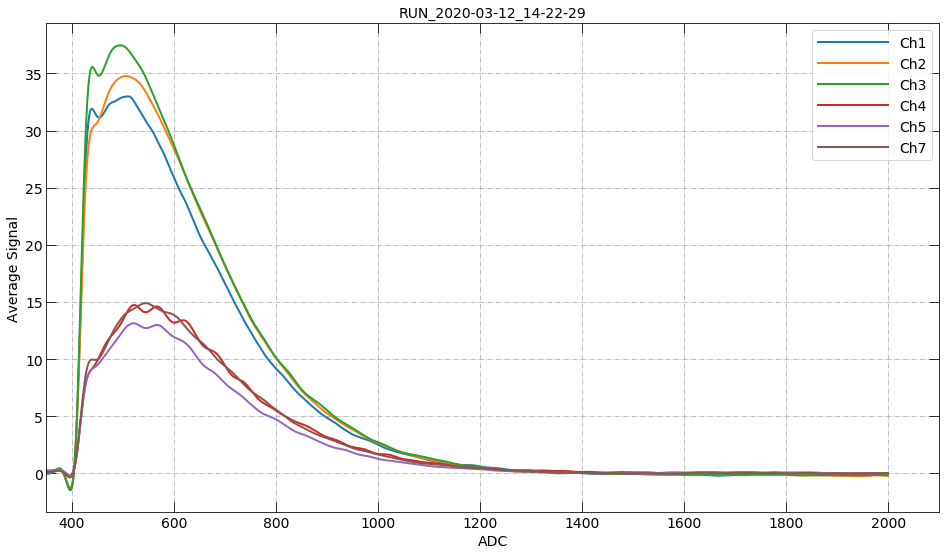

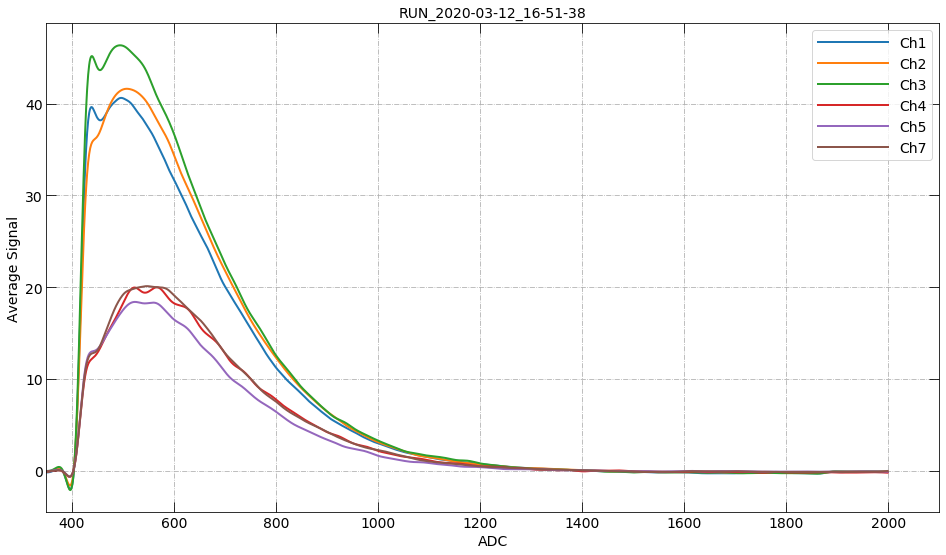

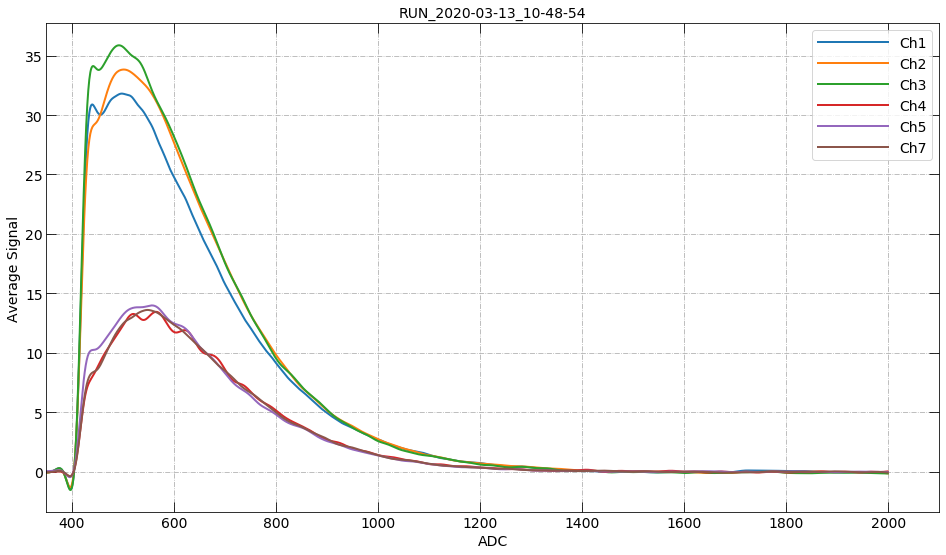

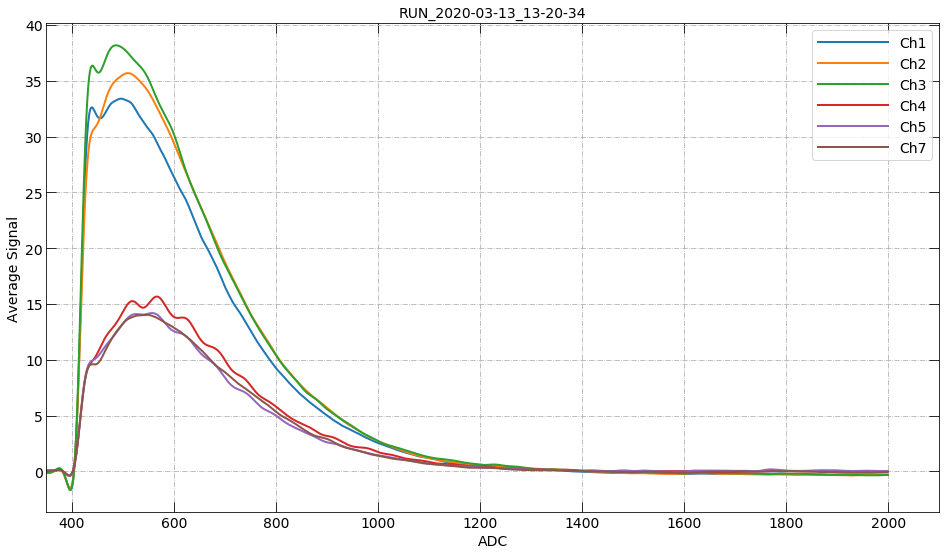

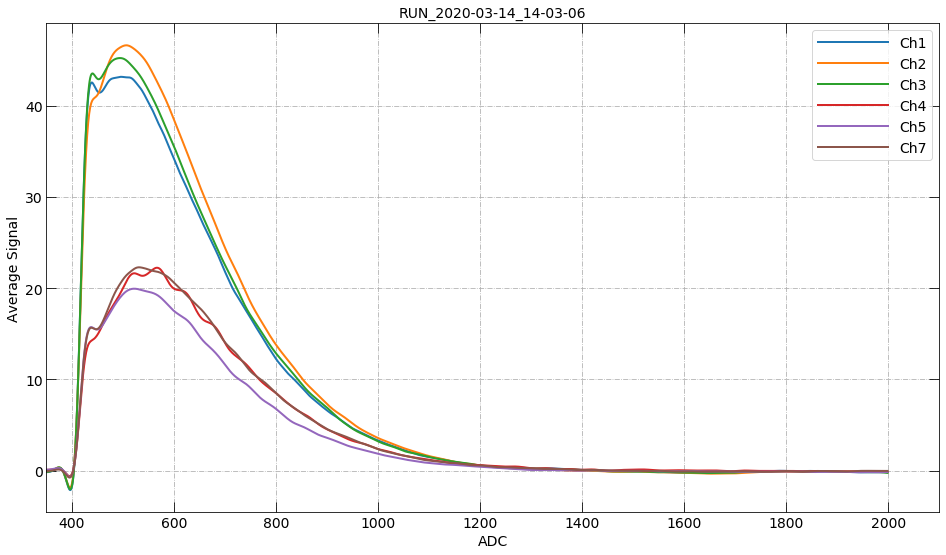

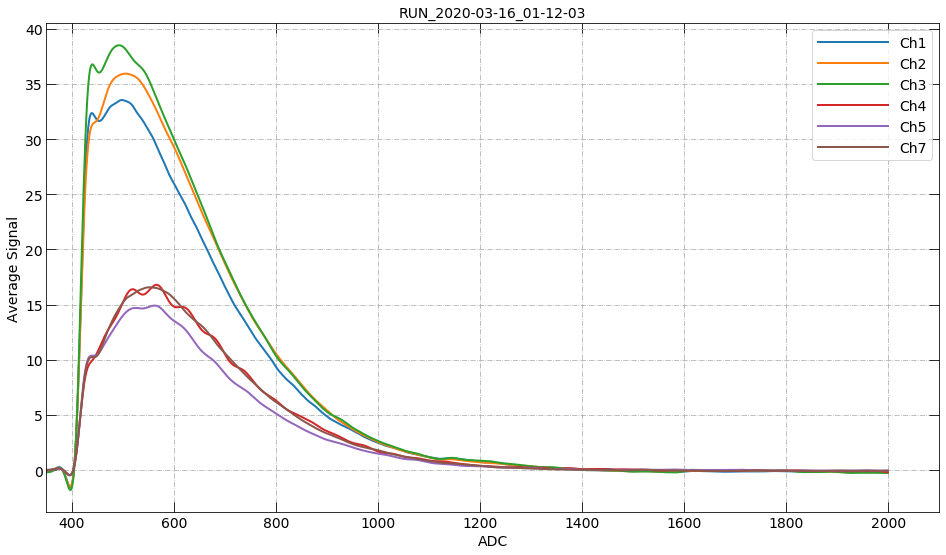

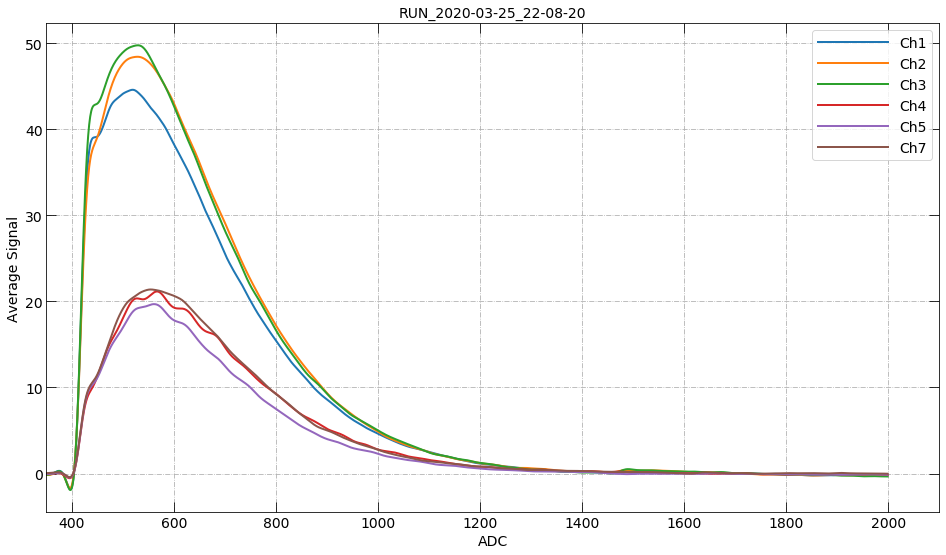

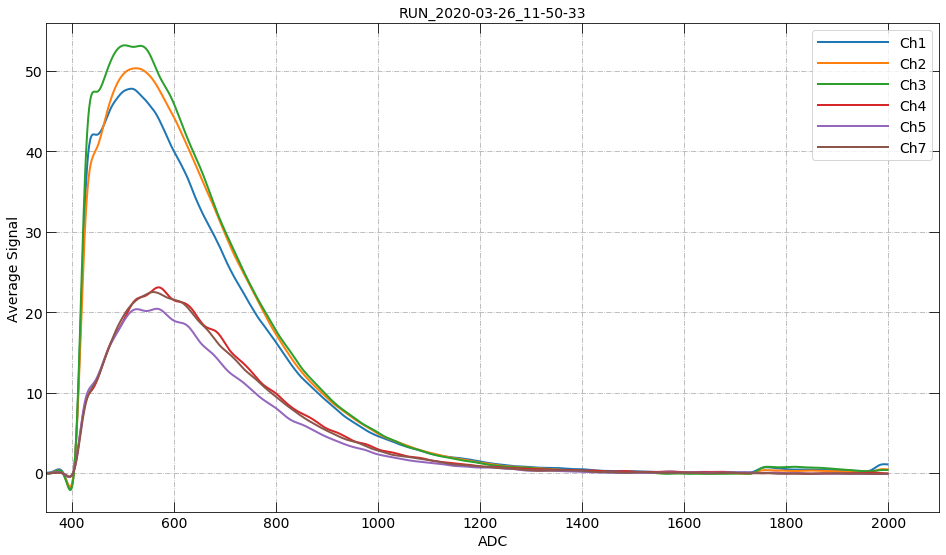

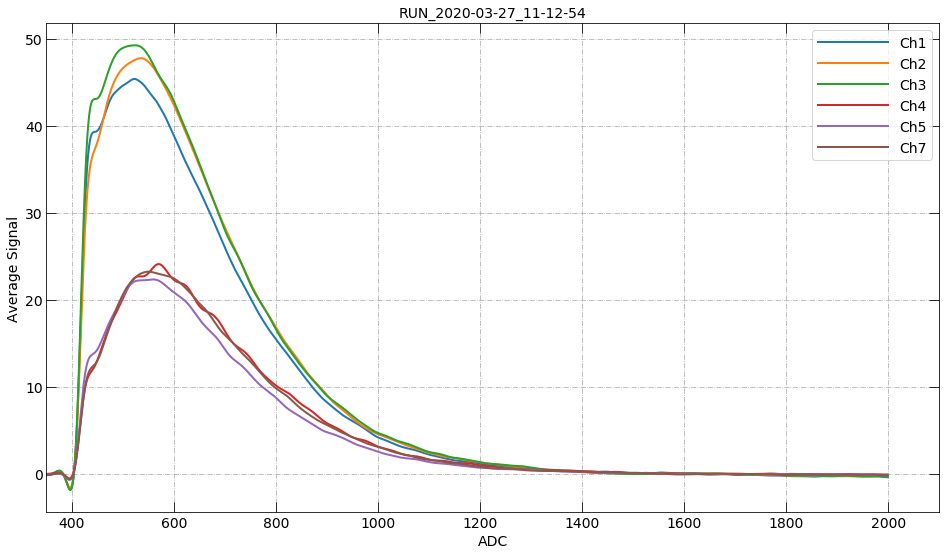

In [5]:
if not os.path.exists('run_filt'):
    os.makedirs('run_filt')
for filename in sorted(os.listdir(dirname)):
    if '.pkl' in filename:
            with open(dirname+filename,'rb') as fin:
                mydata = pickle.load(fin)

            dict_s ={}
            for key, value in mydata.items():
                # lowpass filter
                b, a = signal.butter(3, 0.05)
                zi = signal.lfilter_zi(b, a)
                z, _ = signal.lfilter(b, a, value, zi=zi*value[0])
                z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
                channel = signal.filtfilt(b, a, value)
                 


                dict_s.update({key:channel})

            for key, value in dict_s.items():
                xtime=range(1, len(value) + 1),
                plt.plot(value, label=key, linewidth=2)
            plt.title('RUN_'+str(os.path.splitext(filename)[0]))
            plt.grid(True)
            #plt.yscale('log')
            plt.legend()
            #plt.ylim(0.0001, 100)
            plt.xlim(350, 2100)
            plt.xlabel('ADC')
            plt.ylabel('Average Signal')
            plot_path = os.path.abspath('run_filt') 
            plot_name = 'run_filt'+str(filename.split('.pkl')[0])+'.png'
            plt.savefig(os.path.join(plot_path, plot_name))
            plt.show()    

In [57]:
def model(t, coeffs):
    return coeffs[0]*(np.exp(-t/coeffs[2])-(np.exp(-(t+t)/coeffs[2]*coeffs[1])) + coeffs[3]*(np.exp(-t/coeffs[5])-(np.exp(-(t+t)/coeffs[5]*coeffs[4]))))

x0 = np.array([15000, 1. ,150 , -4, 670, 100], dtype=float)

def residuals(coeffs, y, x):
    return y - model(x, coeffs)
print(x0)

[ 1.5e+04  1.0e+00  1.5e+02 -4.0e+00  6.7e+02  1.0e+02]


1559.4785790571423
1.4993147403927267
159.52864796732572
-19.789828828053018
670.0
72.75196070296991


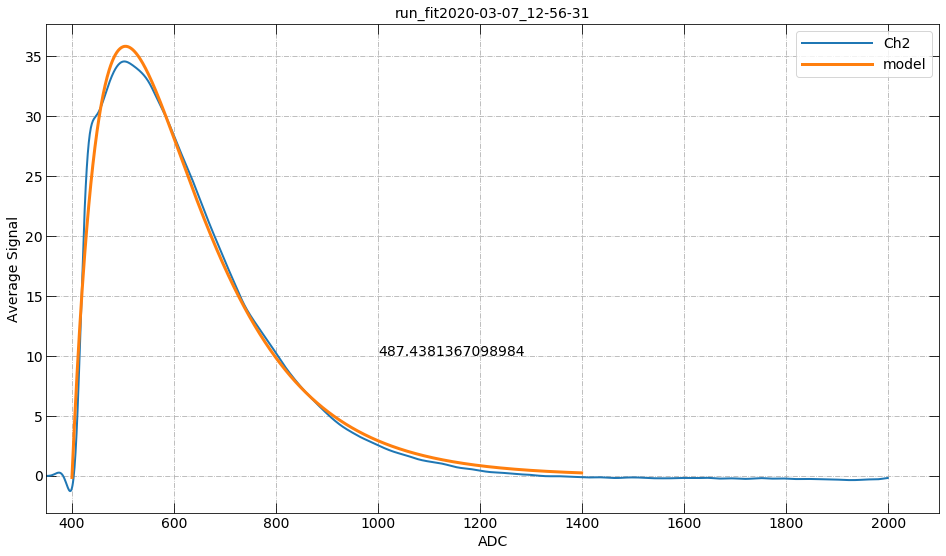

1536.2184593430684
1.5298197784830974
162.588049816264
-20.985541502456908
670.0
72.54922410134833


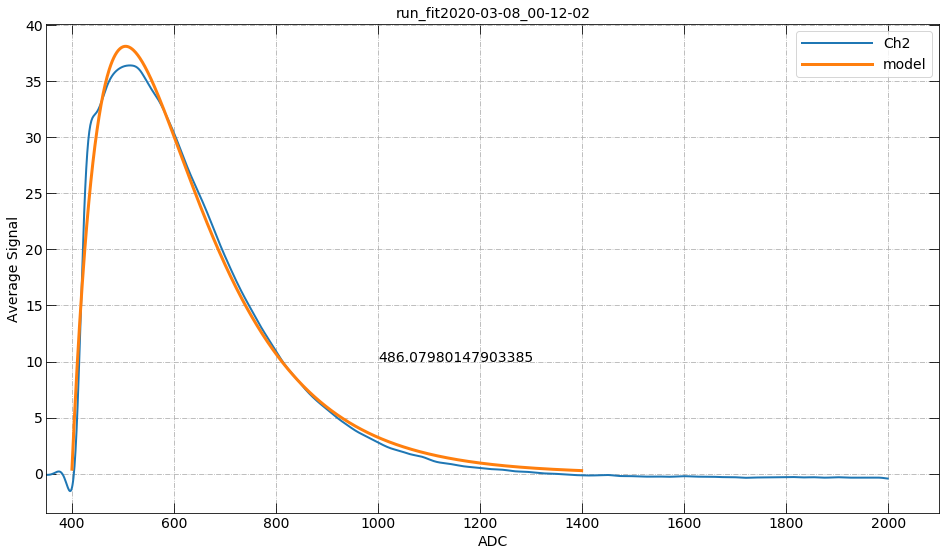

1965.5041992178815
1.3767425920533083
153.63478262034312
-11.916340542867456
670.0
78.5472056122725


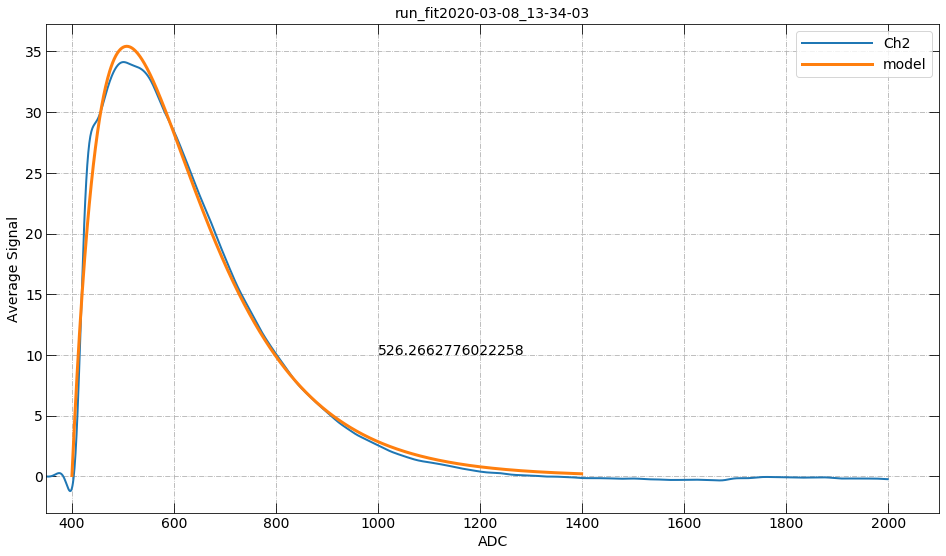

2069.2756011113233
1.3536548713962309
154.23363129814126
-10.30376492525274
670.0
80.9718415002877


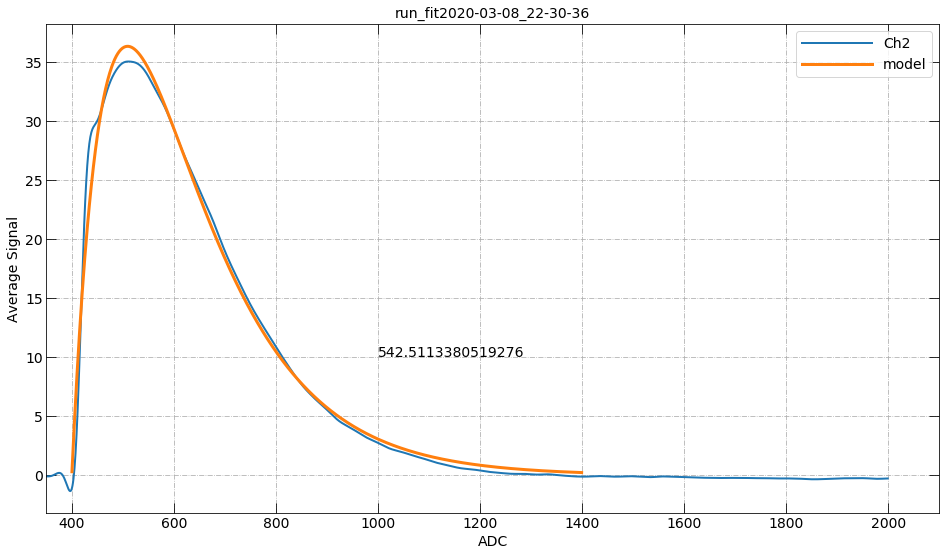

1307.6769426012195
1.6103581176641124
165.01204845747966
-29.56770716307303
670.0
68.76429852475194


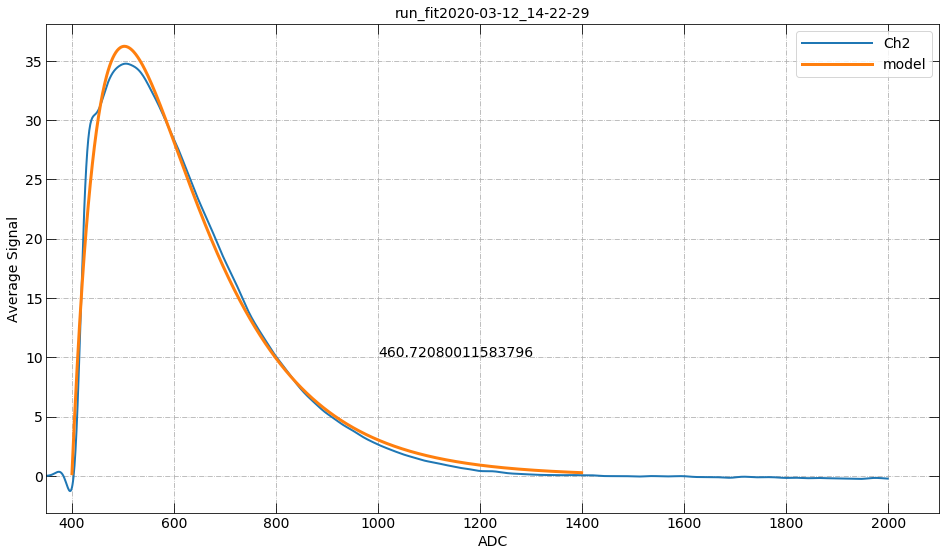

1722.1979736030075
1.5454956779851474
162.67696040074298
-22.62930886597266
670.0
71.61978116708623


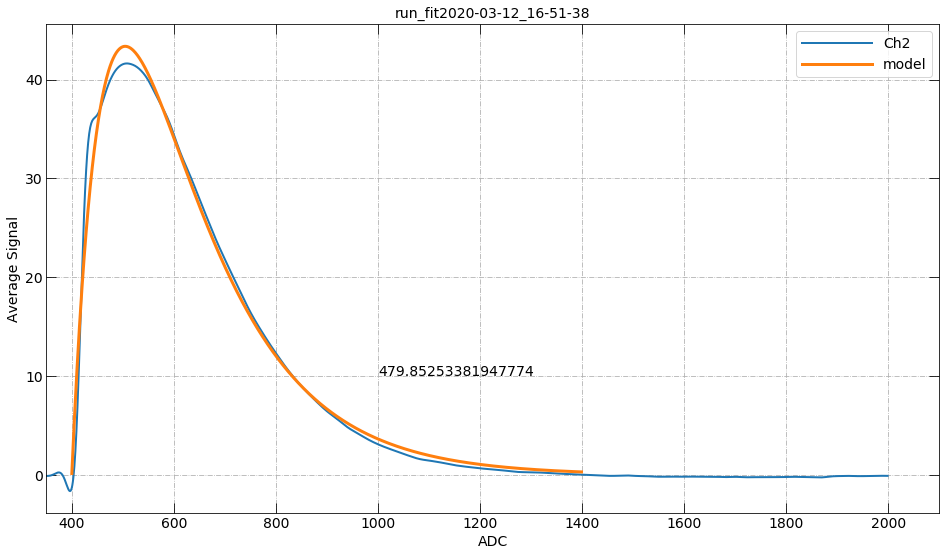

1140.4659693467422
1.684643314794228
168.9824164078009
-37.508738990478896
670.0
66.76967047429129


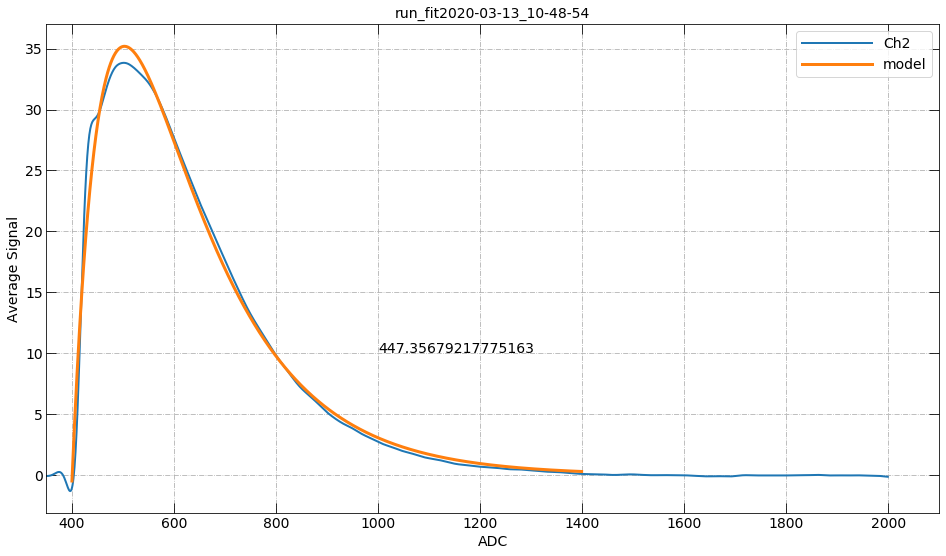

1424.0354268719473
1.5628431257773896
163.82080608952285
-24.126726480858245
670.0
71.03942260293428


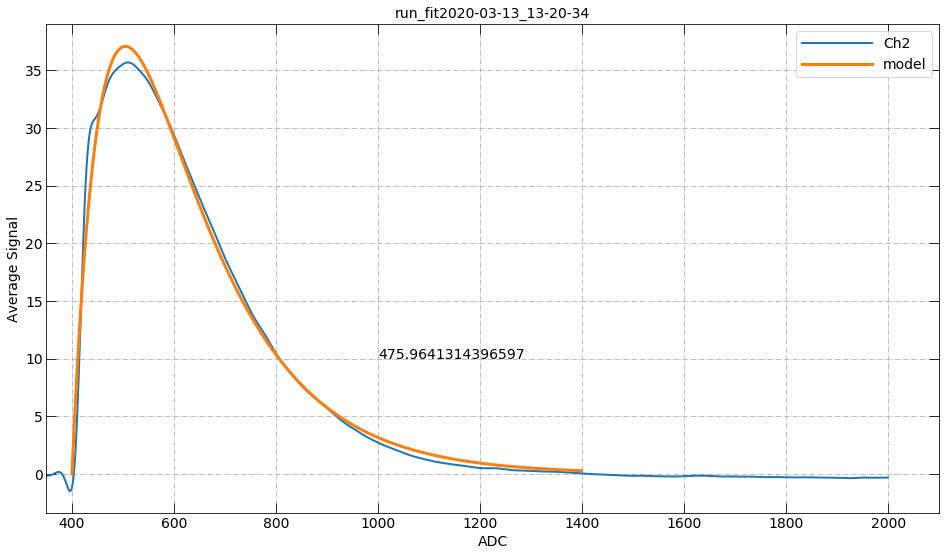

1788.4181949368117
1.5879238244931198
165.12189040873517
-26.343889952588146
670.0
70.16300570478381


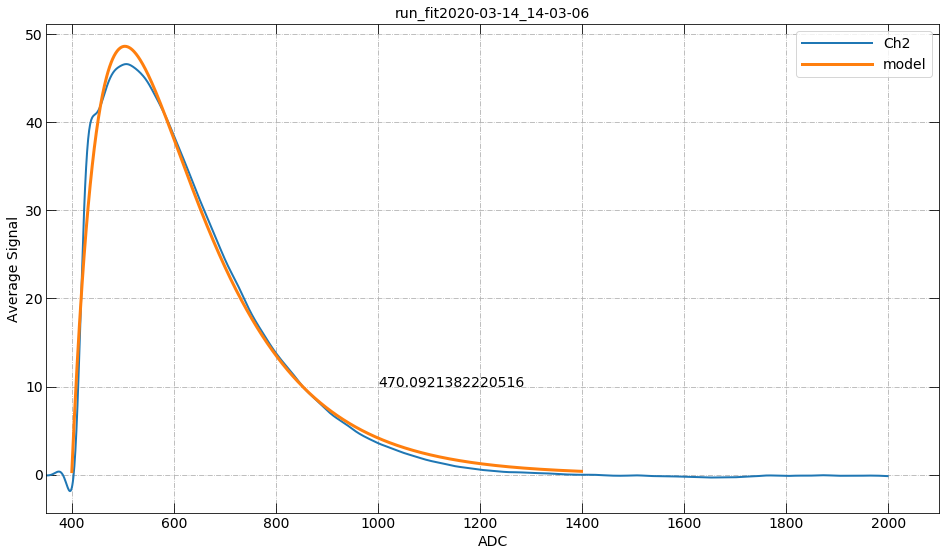

1263.132602891038
1.6588433371027487
167.1705469980021
-35.56636198582787
670.0
67.0314978748215


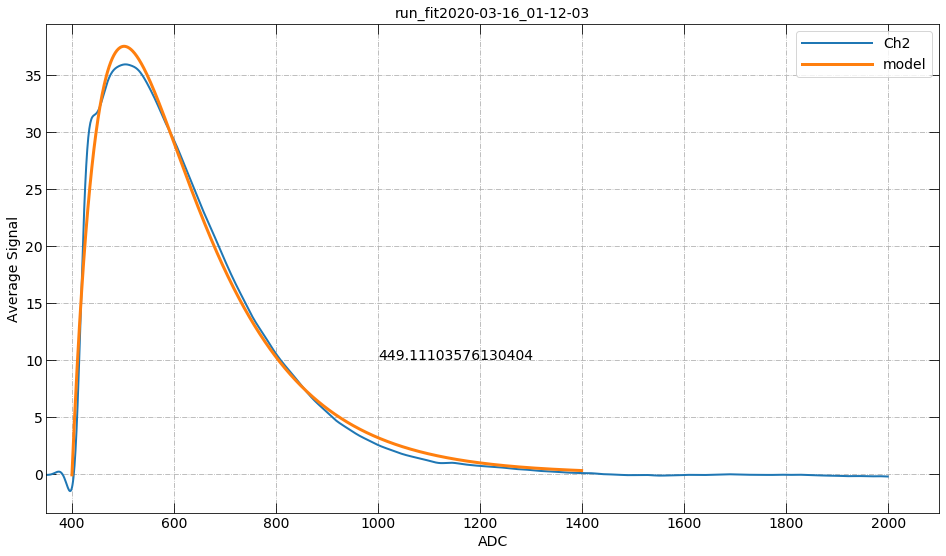

/home/furkan/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:454: RuntimeWarning: Number of calls to function has reached maxfev = 1400.
  warnings.warn(errors[info][0], RuntimeWarning)


839913.8531427602
1.7015133223132342
129.24597478868893
-1.0089908859013228
670.0
128.8511946281227


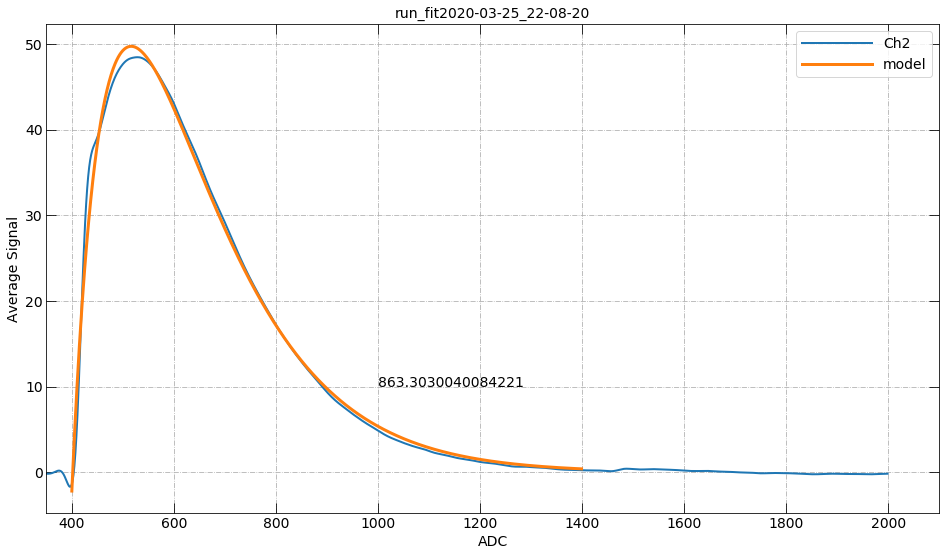

1158764.975065383
1.7340936677416385
127.7680795393557
-1.0071366605557457
670.0
127.46238485926946


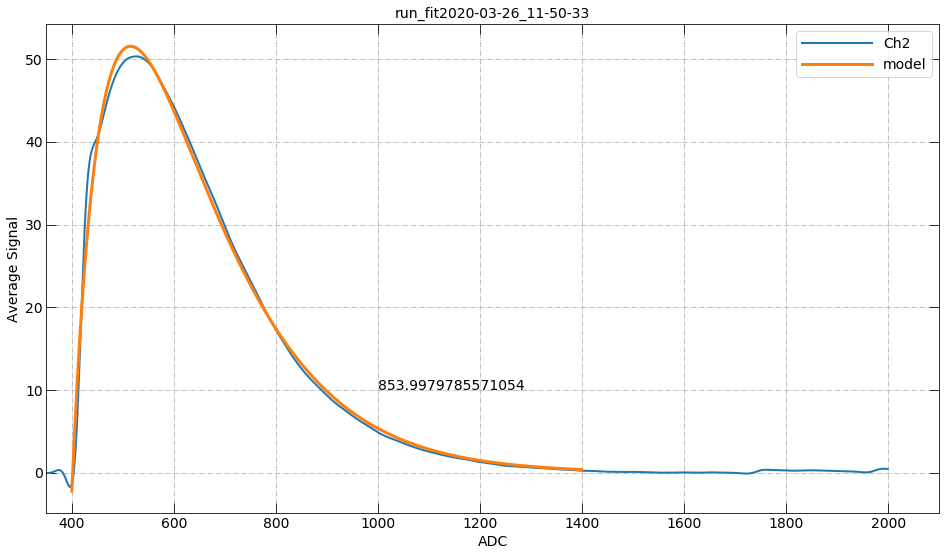

878101.9011499886
1.713944150227104
127.6959674470836
-1.0092145582161982
670.0
127.30532278793973


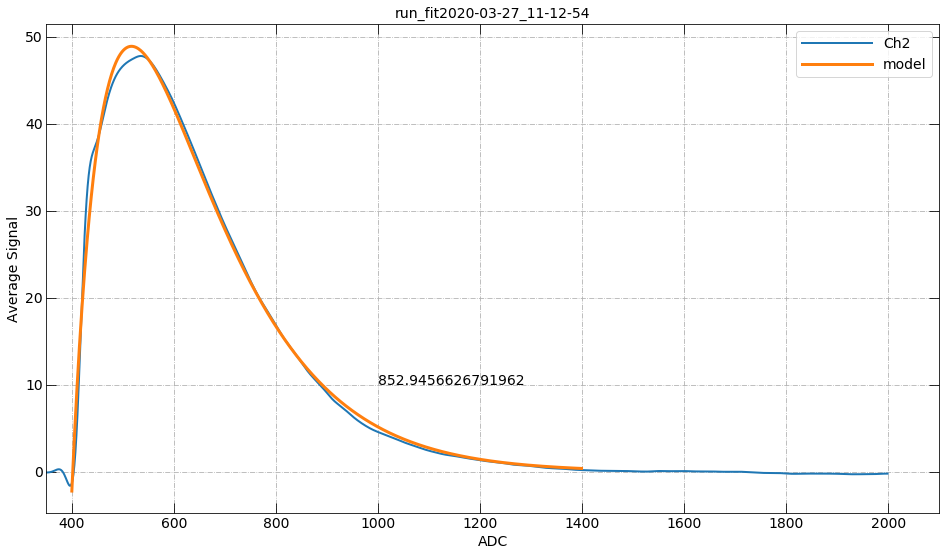

In [68]:
if not os.path.exists('run_fit'):
    os.makedirs('run_fit')
for filename in sorted(os.listdir(dirname)):
    if '.pkl' in filename:
            with open(dirname+filename,'rb') as fin:
                mydata = pickle.load(fin)

            dict_s ={}
            for key, value in mydata.items():
                # lowpass filter
                b, a = signal.butter(3, 0.05)
                zi = signal.lfilter_zi(b, a)
                z, _ = signal.lfilter(b, a, value, zi=zi*value[0])
                z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
                channel = signal.filtfilt(b, a, value)
                 


                dict_s.update({key:channel})
            
            no_window = dict_s['Ch1'] + dict_s['Ch2'] + dict_s['Ch3']
            dict_s.update({'no_window':no_window})
            Quarz = dict_s['Ch4'] + dict_s['Ch5'] + dict_s['Ch7']
            dict_s.update({'Quarz':Quarz})

            for key, value in dict_s.items():
                if 'Ch2'==key:
                    y=value
                    t=np.arange(len(y))
                    x, flag = leastsq(residuals, x0, args=(y[400:1400:1], t[400:1400:1]))
                    for cof in x:
                        print(cof)
                    plt.text(1000, 10, cof*6.7)
                    plt.plot(value, label=key, linewidth=2)
                    plt.plot(t[400:1400:1], model( t[400:1400:1], x),label='model', linewidth=3) 
                    
            plt.title('run_fit'+str(os.path.splitext(filename)[0]))
            plt.grid(True)
            plt.legend()
            plt.xlim(350, 2100)
            plt.xlabel('ADC')
            plt.ylabel('Average Signal')
            plot_path = os.path.abspath('run_fit') 
            plot_name = 'run_fit'+str(filename.split('.pkl')[0])+'.png'
            plt.savefig(os.path.join(plot_path, plot_name))
            plt.show()    
 


In [47]:
if not os.path.exists('run_filt'):
    os.makedirs('run_filt')
for filename in sorted(os.listdir(dirname)):
    if '.pkl' in filename:
            with open(dirname+filename,'rb') as fin:
                mydata = pickle.load(fin)

            dict_s ={}
            for key, value in mydata.items():
                # lowpass filter
                b, a = signal.butter(3, 0.05)
                zi = signal.lfilter_zi(b, a)
                z, _ = signal.lfilter(b, a, value, zi=zi*value[0])
                z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
                channel = signal.filtfilt(b, a, value)
                 


                dict_s.update({key:channel})
            
            no_window = dict_s['Ch1'] + dict_s['Ch2'] + dict_s['Ch3']
            dict_s.update({'no_window':no_window})
            Quarz = dict_s['Ch4'] + dict_s['Ch5'] + dict_s['Ch7']
            dict_s.update({'Quarz':Quarz})

            for key, value in dict_s.items():
                if 'Quarz'==key or 'no_window'==key:
                    y=value
                    t=np.arange(len(y))
                    x, flag = leastsq(residuals, x0, args=(y[600:800:1], t[600:800:1]))
                    for cof in x:
                        print(flag,cof*6.7)

1 39464.85003168335
1 73.47887179466633
1 1022.6190689258664
1 -169.02970677670066
1 4556.0
1 479.0347901237876
5 9216.16146036713
5 67.89670414319787
5 1228.8617149068198
5 -42240.55063799926
5 4556.0
5 294.22100078455753
1 53969.81632170129
1 64.68757293256502
1 982.8962062036394
1 -184.02570034804822
1 4556.0
1 475.51895288947355
5 149798.129328692
5 67.52974150362101
5 853.4181285204543
5 -12.223013488089094
5 4556.0
5 725.4632246092498
1 12130.20246346723
1 88.92656211571136
1 1316.3147045198862
1 -15.736936756240715
1 4556.0
1 39.47912216056416
5 -17180.276014383107
5 122.84238406378411
5 813.5535644931064
5 -3.611737983962657
5 4556.0
5 1264.4845717532064


/home/furkan/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:454: RuntimeWarning: Number of calls to function has reached maxfev = 1400.
  warnings.warn(errors[info][0], RuntimeWarning)
/home/furkan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


5 290685.91737415944
5 61.81979790997079
5 841.2273622189844
5 -12.243944573616746
5 4556.0
5 711.7408752100062
5 8878.009007120472
5 73.31877154925337
5 1259.919800432038
5 -3174.37655851137
5 4556.0
5 364.878657405557
1 5178.680921854198
1 56.21671751383895
1 1328.5026573611215
1 8.599625572576501
1 4556.0
1 1328.5028393392483
5 11630.564348362472
5 54.10720691099456
5 1144.2427787916308
5 -1659.5548012461463
5 4556.0
5 384.0751143158766
1 -5204.840406568224
1 137.03083829879643
1 130.3510962011832
1 -18.91585246931702
1 4556.0
1 1325.1659829513837
5 12220.215854961853
5 75.10883477242511
5 1208.7350954755216
5 -127724.55979437937
5 4556.0
5 269.5924051441651


/home/furkan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in add
  


5 191726.330241322
5 95.41264931445626
5 850.6384443838543
5 -15.31532852703107
5 4556.0
5 677.3120902683793
5 7920.489882405419
5 71.8102465733266
5 1228.3227427768386
5 -142097.74359337418
5 4556.0
5 268.5654324342479
5 240801.93591422914
5 103.71058931399587
5 847.5476081391696
5 -12.534037575769094
5 4556.0
5 706.5774995240586
5 8824.908016779316
5 76.68954426480896
5 1221.571290599846
5 -19636.557236615652
5 4556.0
5 310.9493891175009
1 14763.633926427157
1 72.44088711844128
1 1347.0334931581128
1 -19.015209085751415
1 4556.0
1 122.93252653189873
5 12965.255546739168
5 74.07224140368632
5 1219.8181482864718
5 -34866.65895738449
5 4556.0
5 297.3165466291391
5 -4898.605739506753
5 140.58406506166892
5 5371.983369159253
5 -11.917552604914157
5 4556.0
5 3649.4691047911274
5 -2491.847990514329
5 202.6768376312876
5 13457.086965844795
5 -10.041847770841137
5 4556.0
5 7274.661653238115
1 42063.46111732073
1 74.19364805663074
1 1122.0614545667577
1 -186.68021482834945
1 4556.0
1 493.41020

/home/furkan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in subtract
  


1 44911.88439867724
1 70.5541093904226
1 1104.413803777212
1 -186.186042291561
1 4556.0
1 491.40184320880917
1 5304.417783622439
1 97.40578495786559
1 1646.9518235263174
1 -23.561099615037623
1 4556.0
1 73.34807564628086
